# Interactive Visualisation with Plotly

Graphein provides several visualisation utilities for interacting with protein structure graphs. 

[Visualisation API Reference](https://graphein.ai/modules/graphein.protein.html#module-graphein.protein.visualisation)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/interactive_plotly_example.ipynb)


In [1]:
# Install Graphein if necessary
# !pip install graphein

## Creating graphs
First, we'll create two graphs to work with based on PDB: [3EIY](https://www.rcsb.org/structure/3eiy): a `simple_graph` ($C\alpha$ backbone with peptide bonds) and a `complex_graph` ($C\alpha$ backbone with peptide bonds, hydrogen bonds and ionic interactions).

In [2]:
from graphein.protein.graphs import construct_graph
from graphein.protein.config import ProteinGraphConfig
from graphein.protein.edges.distance import add_hydrogen_bond_interactions, add_ionic_interactions, add_peptide_bonds

# Create backbone graph
config = ProteinGraphConfig()
simple_graph = construct_graph(config, pdb_code="3eiy")

# Create backbone graph with additional interactions
edge_funcs = [add_hydrogen_bond_interactions, add_ionic_interactions, add_peptide_bonds]
config = ProteinGraphConfig(edge_construction_functions= edge_funcs)
complex_graph = construct_graph(config, pdb_code="3eiy")

To use the Graphein submodule graphein.protein.features.sequence.embeddings, you need to install biovec.

biovec cannot be installed via conda
To use the Graphein submodule graphein.protein.visualisation, you need to install pytorch3d.

To do so, use the following command:

    conda install -c pytorch3d pytorch3d
To use the Graphein submodule graphein.protein.meshes, you need to install pytorch3d.

To do so, use the following command:

    conda install -c pytorch3d pytorch3d


DEBUG:graphein.protein.graphs:Deprotonating protein. This removes H atoms from the pdb_df dataframe
DEBUG:graphein.protein.graphs:Detected 174 total nodes
DEBUG:graphein.protein.features.nodes.amino_acid:Reading meiler embeddings from: /Users/arianjamasb/github/graphein/graphein/protein/features/nodes/meiler_embeddings.csv
DEBUG:graphein.protein.graphs:Deprotonating protein. This removes H atoms from the pdb_df dataframe
DEBUG:graphein.protein.graphs:Detected 174 total nodes
INFO:graphein.protein.edges.distance:Found 75 hbond interactions.
INFO:graphein.protein.edges.distance:Found 7 hbond interactions.
INFO:graphein.protein.edges.distance:Found 175 ionic interactions.


## Distance Matrix and Contact Map

Distance matrices are a representation of protein structure. They take the form of an $N \times N$ matrix, where $N$ is, typically, the length of the sequence. The entries of the matrix correspond to the euclidean distance (in Å) between the residues. Distance matrices are also computable for atom-level graphs, though these are of course much larger.

Distance matrices and contact maps can be visualised with [`plot_distance_matrix()`](https://graphein.ai/modules/graphein.protein.html#graphein.protein.visualisation.plot_distance_matrix)

In [3]:
from graphein.protein.visualisation import plot_distance_matrix

plot_distance_matrix(simple_graph)

One can construct a contact map by thresholding the distance matrix to some arbirary distance (10 Å in our example).

In [8]:
contact_map = (simple_graph.graph["dist_mat"] > 10).astype(int) # Threshold distance matrix
plot_distance_matrix(g=simple_graph, dist_mat=contact_map) # Plot contact map

## Distance Landscape
We can also visualise the distance matrix as a landscape in 3D using [`plot_distance_landscape()`](https://graphein.ai/modules/graphein.protein.html#graphein.protein.visualisation.plot_distance_landscape). In this plot, the distance is represented by both the colour and the height of the peaks.

In [9]:
from graphein.protein.visualisation import plot_distance_landscape

plot_distance_landscape(simple_graph)

## Plot 3D Structure

Graphein provides two main ways of visualising protein graph structures. These are based on plotly (interactive) and matplotlib (static).

### Interactive

Interactive visualisation can be performed by using [`plotly_protein_structure_graph()`](https://graphein.ai/modules/graphein.protein.html#graphein.protein.visualisation.plotly_protein_structure_graph)

#### Parameters
```
G: nx.Graph,
plot_title: Optional[str] = None,
figsize: Tuple[int, int] = (620, 650),
node_alpha: float = 0.7,
node_size_min: float = 20.0,
node_size_multiplier: float = 20.0,
label_node_ids: bool = True,
node_colour_map=plt.cm.plasma,
edge_color_map=plt.cm.plasma,
colour_nodes_by: str = "degree",
colour_edges_by: str = "type",
edge_alpha: float = 0.5,
```

#### Plots

In [10]:
from graphein.protein.visualisation import plotly_protein_structure_graph

plotly_protein_structure_graph(
    G=simple_graph,
    plot_title="Simple Protein Structure (Backbone only)",
    colour_nodes_by="residue_number",
    colour_edges_by="kind",
    node_size_min=1
    )

In [10]:
from graphein.protein.visualisation import plotly_protein_structure_graph

plotly_protein_structure_graph(
    G=complex_graph,
    plot_title="Residue level graph with Hydrogen bonds, ionic interactions and peptide bonds",
    colour_nodes_by="residue_number",
    colour_edges_by="kind",
    node_size_min=20,
    node_size_multiplier=1
    )

#### Atom-level Plots
We can also plot atomic graphs of protein structures in exactly the same way.

In [11]:
from graphein.protein.edges.atomic import add_atomic_edges
config = ProteinGraphConfig(granularity='atom', edge_construction_functions=[add_atomic_edges])
g = construct_graph(config, pdb_code="3eiy")

# Create atomic graph
plotly_protein_structure_graph(
    g,
    plot_title="Atom level graph",
    colour_nodes_by="atom_type",
    colour_edges_by="kind",
    node_size_min=10,
    node_size_multiplier=1
    )

DEBUG:graphein.protein.graphs:Deprotonating protein. This removes H atoms from the pdb_df dataframe
DEBUG:graphein.protein.graphs:Detected 1330 total nodes


### Static Plots
Static plots can be generated with matplotlib using [`plot_protein_structure_graph()`](https://graphein.ai/modules/graphein.protein.html#graphein.protein.visualisation.plot_protein_structure_graph).


#### Parameters

```python
G (nx.Graph)                       # nx.Graph Protein Structure graph to plot
angle (int)                        # View angle
plot_title (str, optional)         # Title of plot. Defaults to None
figsize (Tuple[int, int])          # Size of figure, defaults to (10, 7)
node_alpha (float)                 # Controls node transparency, defaults to 0.7
node_size_min (float)              # Specifies node minimum size, defaults to 20
node_size_multiplier (float)       # Scales node size by a constant. Node sizes reflect degree.
label_node_ids (bool)              # bool indicating whether or not to plot node_id labels
node_colour_map (plt.cm)           # colour map to use for nodes
edge_color_map (plt.cm)            # colour map to use for edges
colour_nodes_by (str)              # Specifies how to colour nodes. “degree”, “seq_position” or a node feature
colour_edges_by                    # Specifies how to colour edges. Currently only “kind” is supported
edge_alpha                         # Controls edge transparency
plot_style                         # matplotlib style sheet to use
out_path                           # If not none, writes plot to this location
out_format                         # Fileformat to use for plot
```

/Users/arianjamasb/github/graphein/graphein/protein/visualisation.py:345: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



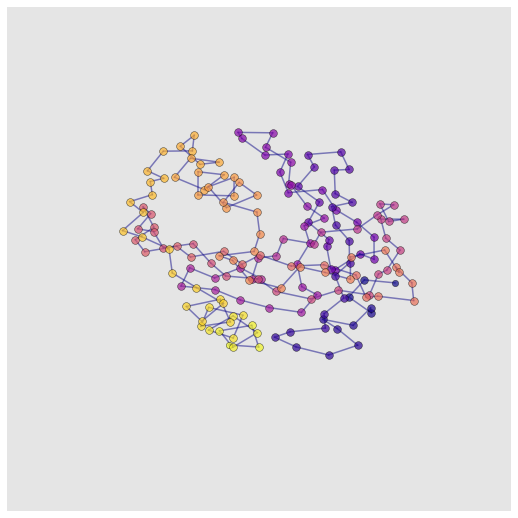

In [12]:
from graphein.protein.visualisation import plot_protein_structure_graph

p = plot_protein_structure_graph(G=simple_graph, angle=0, colour_edges_by="kind", colour_nodes_by="seq_position", label_node_ids=False)

## Asteroid Plot
Asteroid plots show a central node and the neighbours in each 'shell' (hop) away from it. Asteroid plots are useful for understanding the neighborhood context of a particular residue which has applications in protein engineering, structure-based drug design and interpretation of the impact of mutations.


Asteroid plots can be generated with [`asteroid_plot()`](https://graphein.ai/modules/graphein.protein.html#graphein.protein.visualisation.asteroid_plot)

*Asteroid plots are based on the schematic outlined in:*

> Kayikci, M., Venkatakrishnan, A.J., Scott-Brown, J. et al. Visualization and analysis of non-covalent contacts using the Protein Contacts Atlas. Nat Struct Mol Biol 25, 185–194 (2018). https://doi.org/10.1038/s41594-017-0019-z


### Parameters

```python
g (nx.Graph)                                    # NetworkX graph to plot.
node_id (str)                                   # Node to centre the plot around.
k (int, defaults to 2)                          # Number of hops to plot
colour_by (str, defaults to "shell")            # Colour the nodes by this attribute. Currently only “shell” is supported.
title (str, defaults to None)                   # Title of the plot.
width                                           # Width of the plot.
use_plotly (bool, defaults to True)             # Use plotly to render the graph.
show_edges (bool, defaults to False)            # Whether or not to show edges in the plot.
node_size_multiplier (float, defaults to 10)    # Multiplier for the size of the nodes.
```


In [13]:
from graphein.protein.visualisation import asteroid_plot
asteroid_plot(complex_graph, node_id="A:VAL:70", k=4, colour_by="shell")

DEBUG:graphein.protein.subgraphs:Found 3 nodes in the k-hop subgraph.
DEBUG:graphein.protein.subgraphs:Creating subgraph from nodes: ['A:VAL:70', 'A:PRO:69', 'A:ASP:71'].
DEBUG:graphein.protein.subgraphs:Found 7 nodes in the k-hop subgraph.
DEBUG:graphein.protein.subgraphs:Creating subgraph from nodes: ['A:TYR:56', 'A:VAL:70', 'A:PRO:69', 'A:ASP:71', 'A:ASP:68', 'A:VAL:72', 'A:LYS:105'].
DEBUG:graphein.protein.subgraphs:Found 14 nodes in the k-hop subgraph.
DEBUG:graphein.protein.subgraphs:Creating subgraph from nodes: ['A:TYR:56', 'A:ASN:55', 'A:ALA:104', 'A:VAL:70', 'A:PRO:69', 'A:ASP:71', 'A:GLY:67', 'A:LEU:73', 'A:GLY:57', 'A:ASP:68', 'A:ASP:103', 'A:VAL:72', 'A:LEU:106', 'A:LYS:105'].
DEBUG:root:Plotting shells: [['A:VAL:70'], ['A:PRO:69', 'A:ASP:71'], ['A:TYR:56', 'A:ASP:68', 'A:VAL:72', 'A:LYS:105'], ['A:ASN:55', 'A:ALA:104', 'A:GLY:67', 'A:LEU:73', 'A:GLY:57', 'A:ASP:103', 'A:LEU:106']]
